In [168]:
def perceptron(x1, x2, w1, w2, b):
    z = w1 * x1 + w2 * x2 + b
    return 1 if z >= 0 else 0

X = [[0,0], [0,1], [1,0], [1,1]]
y =  [0,     0,     0,     1]  # AND lógico



In [164]:
w1, w2, b = 1, 1, -1.5
print("AND")
for x1,x2 in X:
    print(f" {x1} {x2} → {perceptron(x1, x2, w1, w2, b)}")

AND
 0 0 → 0
 0 1 → 0
 1 0 → 0
 1 1 → 1


In [184]:
import random

max_attempts = 200000
for attempt in range(max_attempts):
    w1 = random.uniform(-1, 1)
    w2 = random.uniform(-1, 1)
    b  = random.uniform(-1, 1)

    for [x1, x2], yy in zip(X, y):
        if perceptron(x1, x2, w1, w2, b) != yy:
            break
    else:
        print(f"Encontrado: w1={w1:.2f}, w2={w2:.2f}, b={b:.2f} (intento {attempt+1})")
        break
else:
    print(f"No se encontró una solución en {max_attempts} intentos")

Encontrado: w1=0.78, w2=0.63, b=-0.94 (intento 116)


In [190]:
valores = range(-3, 3)
for w1 in valores:
    for w2 in valores:
        for b in valores:
            for [x1, x2], yy in zip(X, y):
                if perceptron(x1, x2, w1, w2, b) != yy:
                    break
            else:
                print(f"Encontrado: w1={w1}, w2={w2}, b={b}")

Encontrado: w1=1, w2=1, b=-2
Encontrado: w1=1, w2=2, b=-3
Encontrado: w1=2, w2=1, b=-3
Encontrado: w1=2, w2=2, b=-3


In [192]:
w1 = random.uniform(-1, 1)
w2 = random.uniform(-1, 1)
b  = random.uniform(-1, 1)
for epoch in range(10000):
    for [x1, x2], yy in zip(X, y):
        y_pred = perceptron(x1, x2, w1, w2, b)
        error = yy - y_pred
        
        w1 += error * x1 * 0.1
        w2 += error * x2 * 0.1
        b  += error * 0.1
print(f"Entrenado: w1={w1:.2f}, w2={w2:.2f}, b={b:.2f}")#!/usr/bin/env python3

Entrenado: w1=0.79, w2=0.31, b=-0.82


In [195]:
class Perceptron:
    def __init__(self, epochs=1000, learning_rate=0.1):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.w1 = 0
        self.w2 = 0
        self.b = 0
        
    def fit(self, X, y):
        for epoch in range(self.epochs):
            for [x1, x2], yy in zip(X, y):
                y_pred = self.predict(x1, x2)
                error = yy - y_pred
                
                self.w1 += error * x1 * self.learning_rate
                self.w2 += error * x2 * self.learning_rate
                self.b  += error * self.learning_rate
                
    def predict(self, x1, x2):
        z = self.w1 * x1 + self.w2 * x2 + self.b
        return 1 if z >= 0 else 0
    
p = Perceptron(epochs=10000, learning_rate=0.1)
X = [[0,0], [0,1], [1,0], [1,1]]
y =  [0,     0,     0,     1]  # AND lógico
p.fit(X, y)
print(f"Entrenado: w1={p.w1:.2f}, w2={p.w2:.2f}, b={p.b:.2f}")

Entrenado: w1=0.20, w2=0.10, b=-0.20


In [213]:
import random

class Perceptron:
    def __init__(self, epochs=1000, learning_rate=0.1):
        self.epochs = epochs
        self.learning_rate = learning_rate
        # self.weights = [0] * size
        self.bias = 0

    def fit(self, X, y):
        self.size = len(X[0])
        self.weights = [0] * self.size
        for i in range(self.size):
            self.weights[i] = random.uniform(-1, 1)
        self.bias = random.uniform(-1, 1)
            
        for epoch in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(*inputs)
                error = target - prediction
                self.weights = [w + self.learning_rate * error * x for w, x in zip(self.weights, inputs)]
                self.bias += self.learning_rate * error

    def predict(self, *inputs):
        z = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        return 1 if z >= 0 else 0

p = Perceptron(epochs=10000, learning_rate=0.1)
X = [[0,0], [0,1], [1,0], [1,1]]
y =  [0,     0,     0,     1]  # AND lógico
p.fit(X, y)
print(f"Entrenado: w1={p.weights[0]:.2f}, w2={p.weights[1]:.2f}, b={p.bias:.2f}")

p3 = Perceptron(epochs=10000, learning_rate=0.1)
X3 = [[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1]]
y3 =  [0,     0,     0,     0,     0,     0,     0,     1]  # AND lógico de 3 entradas

p3.fit(X3, y3)
print(f"Entrenado (3 entradas): w1={p3.weights[0]:.2f}, w2={p3.weights[1]:.2f}, w3={p3.weights[2]:.2f}, b={p3.bias:.2f}")#/

Entrenado: w1=0.18, w2=0.05, b=-0.18
Entrenado (3 entradas): w1=0.29, w2=0.21, w3=0.08, b=-0.53


In [ ]:
import random
import math

class PerceptronMulticapa:
    def __init__(self, num_entradas, num_ocultas, num_salidas, tasa_aprendizaje=0.1):
        self.tasa_aprendizaje = tasa_aprendizaje
        
        # Pesos de entrada a capa oculta
        self.pesos_entrada_oculta = [[random.uniform(-1, 1) for _ in range(num_ocultas)] for _ in range(num_entradas)]
        self.sesgo_oculta = [random.uniform(-1, 1) for _ in range(num_ocultas)]
        
        # Pesos de capa oculta a salida
        self.pesos_oculta_salida = [[random.uniform(-1, 1) for _ in range(num_salidas)] for _ in range(num_ocultas)]
        self.sesgo_salida = [random.uniform(-1, 1) for _ in range(num_salidas)]
    
    def sigmoide(self, x):
        return 1 / (1 + math.exp(-x))
    
    def derivada_sigmoide(self, x):
        return x * (1 - x)
    
    def propagacion_adelante(self, entradas):
        # Calcular activaciones de la capa oculta
        self.activacion_oculta = []
        for j in range(len(self.sesgo_oculta)):
            suma = self.sesgo_oculta[j]
            for i in range(len(entradas)):
                suma += entradas[i] * self.pesos_entrada_oculta[i][j]
            self.activacion_oculta.append(self.sigmoide(suma))
        
        # Calcular activaciones de la capa de salida
        self.activacion_salida = []
        for k in range(len(self.sesgo_salida)):
            suma = self.sesgo_salida[k]
            for j in range(len(self.activacion_oculta)):
                suma += self.activacion_oculta[j] * self.pesos_oculta_salida[j][k]
            self.activacion_salida.append(self.sigmoide(suma))
        
        return self.activacion_salida
    
    def retropropagacion(self, entradas, objetivo):
        # Calcular error de salida
        error_salida = []
        for k in range(len(self.activacion_salida)):
            error = objetivo[k] - self.activacion_salida[k]
            error_salida.append(error * self.derivada_sigmoide(self.activacion_salida[k]))
        
        # Calcular error de capa oculta
        error_oculta = []
        for j in range(len(self.activacion_oculta)):
            error = 0
            for k in range(len(error_salida)):
                error += error_salida[k] * self.pesos_oculta_salida[j][k]
            error_oculta.append(error * self.derivada_sigmoide(self.activacion_oculta[j]))
        
        # Actualizar pesos de oculta a salida
        for j in range(len(self.activacion_oculta)):
            for k in range(len(error_salida)):
                self.pesos_oculta_salida[j][k] += self.tasa_aprendizaje * error_salida[k] * self.activacion_oculta[j]
        
        # Actualizar sesgos de salida
        for k in range(len(error_salida)):
            self.sesgo_salida[k] += self.tasa_aprendizaje * error_salida[k]
        
        # Actualizar pesos de entrada a oculta
        for i in range(len(entradas)):
            for j in range(len(error_oculta)):
                self.pesos_entrada_oculta[i][j] += self.tasa_aprendizaje * error_oculta[j] * entradas[i]
        
        # Actualizar sesgos de capa oculta
        for j in range(len(error_oculta)):
            self.sesgo_oculta[j] += self.tasa_aprendizaje * error_oculta[j]
    
    def entrenar(self, X, y, epocas=10000):
        for epoca in range(epocas):
            for entradas, objetivo in zip(X, y):
                self.propagacion_adelante(entradas)
                self.retropropagacion(entradas, objetivo)
    
    def predecir(self, entradas):
        salidas = self.propagacion_adelante(entradas)
        return [1 if s >= 0.5 else 0 for s in salidas]

# Ejemplo: Entrenar XOR (problema no linealmente separable)
print("=== Entrenando XOR con Perceptrón Multicapa ===")
mlp = PerceptronMulticapa(num_entradas=2, num_ocultas=3, num_salidas=1, tasa_aprendizaje=0.5)

X_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_xor = [[0], [1], [1], [0]]  # XOR

mlp.entrenar(X_xor, y_xor, epocas=10000)

print("\nResultados XOR:")
for x in X_xor:
    prediccion = mlp.predecir(x)
    print(f"  {x[0]} XOR {x[1]} = {prediccion[0]}")


=== Entrenando XOR con Perceptrón Multicapa ===

Resultados XOR:
  0 XOR 0 = 0
  0 XOR 1 = 1
  1 XOR 0 = 1
  1 XOR 1 = 0


In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Modificar el Perceptrón Multicapa para regresión (sin umbral en la salida)
class PerceptronMulticapaRegresion:
    def __init__(self, num_entradas, num_ocultas, num_salidas, tasa_aprendizaje=0.01):
        self.tasa_aprendizaje = tasa_aprendizaje
        
        # Pesos de entrada a capa oculta
        self.pesos_entrada_oculta = [[random.uniform(-1, 1) for _ in range(num_ocultas)] for _ in range(num_entradas)]
        self.sesgo_oculta = [random.uniform(-1, 1) for _ in range(num_ocultas)]
        
        # Pesos de capa oculta a salida
        self.pesos_oculta_salida = [[random.uniform(-1, 1) for _ in range(num_salidas)] for _ in range(num_ocultas)]
        self.sesgo_salida = [random.uniform(-1, 1) for _ in range(num_salidas)]
    
    def sigmoide(self, x):
        return 1 / (1 + math.exp(-max(-500, min(500, x))))  # Evitar overflow
    
    def derivada_sigmoide(self, x):
        return x * (1 - x)
    
    def propagacion_adelante(self, entradas):
        # Calcular activaciones de la capa oculta
        self.activacion_oculta = []
        for j in range(len(self.sesgo_oculta)):
            suma = self.sesgo_oculta[j]
            for i in range(len(entradas)):
                suma += entradas[i] * self.pesos_entrada_oculta[i][j]
            self.activacion_oculta.append(self.sigmoide(suma))
        
        # Calcular activaciones de la capa de salida (sin sigmoide para regresión)
        self.activacion_salida = []
        for k in range(len(self.sesgo_salida)):
            suma = self.sesgo_salida[k]
            for j in range(len(self.activacion_oculta)):
                suma += self.activacion_oculta[j] * self.pesos_oculta_salida[j][k]
            self.activacion_salida.append(suma)  # Salida lineal para regresión
        
        return self.activacion_salida
    
    def retropropagacion(self, entradas, objetivo):
        # Calcular error de salida (sin derivada porque la salida es lineal)
        error_salida = []
        for k in range(len(self.activacion_salida)):
            error = objetivo[k] - self.activacion_salida[k]
            error_salida.append(error)
        
        # Calcular error de capa oculta
        error_oculta = []
        for j in range(len(self.activacion_oculta)):
            error = 0
            for k in range(len(error_salida)):
                error += error_salida[k] * self.pesos_oculta_salida[j][k]
            error_oculta.append(error * self.derivada_sigmoide(self.activacion_oculta[j]))
        
        # Actualizar pesos de oculta a salida
        for j in range(len(self.activacion_oculta)):
            for k in range(len(error_salida)):
                self.pesos_oculta_salida[j][k] += self.tasa_aprendizaje * error_salida[k] * self.activacion_oculta[j]
        
        # Actualizar sesgos de salida
        for k in range(len(error_salida)):
            self.sesgo_salida[k] += self.tasa_aprendizaje * error_salida[k]
        
        # Actualizar pesos de entrada a oculta
        for i in range(len(entradas)):
            for j in range(len(error_oculta)):
                self.pesos_entrada_oculta[i][j] += self.tasa_aprendizaje * error_oculta[j] * entradas[i]
        
        # Actualizar sesgos de capa oculta
        for j in range(len(error_oculta)):
            self.sesgo_oculta[j] += self.tasa_aprendizaje * error_oculta[j]
    
    def entrenar(self, X, y, epocas=10000):
        for epoca in range(epocas):
            for entradas, objetivo in zip(X, y):
                self.propagacion_adelante(entradas)
                self.retropropagacion(entradas, objetivo)
            
            # Mostrar progreso cada 2000 épocas
            if (epoca + 1) % 2000 == 0:
                error_total = 0
                for entradas, objetivo in zip(X, y):
                    prediccion = self.propagacion_adelante(entradas)
                    error_total += sum((objetivo[k] - prediccion[k])**2 for k in range(len(objetivo)))
                error_promedio = error_total / len(X)
                print(f"Época {epoca+1}/{epocas}, Error cuadrático medio: {error_promedio:.6f}")
    
    def predecir(self, entradas):
        return self.propagacion_adelante(entradas)


# Función cúbica para generar datos
def funcion_cubica(x):
    return 0.5 * x**3 - 2 * x**2 + x + 1

# Generar datos de entrenamiento
print("=== Generando datos de la función cúbica ===")
print("f(x) = 0.5x³ - 2x² + x + 1\n")

X_entrenamiento = []
y_entrenamiento = []

for i in range(50):
    x = random.uniform(-3, 4)
    y = funcion_cubica(x) + random.uniform(-3, 3)  # Añadir ruido
    X_entrenamiento.append([x])
    y_entrenamiento.append([y])

print(f"Datos generados: {len(X_entrenamiento)} puntos")
print(f"Rango de x: [{min(X_entrenamiento)[0]:.2f}, {max(X_entrenamiento)[0]:.2f}]")
print(f"Rango de y: [{min(y_entrenamiento)[0]:.2f}, {max(y_entrenamiento)[0]:.2f}]\n")


=== Generando datos de la función cúbica ===
f(x) = 0.5x³ - 2x² + x + 1

Datos generados: 50 puntos
Rango de x: [-2.98, 3.71]
Rango de y: [-33.74, 3.62]



In [234]:
# Crear y entrenar el perceptrón multicapa
print("=== Entrenando el Perceptrón Multicapa ===\n")
mlp_regresion = PerceptronMulticapaRegresion(
    num_entradas=1, 
    num_ocultas=5,  # 10 neuronas ocultas para capturar la complejidad
    num_salidas=1, 
    tasa_aprendizaje=0.01
)

mlp_regresion.entrenar(X_entrenamiento, y_entrenamiento, epocas=100_000)
print("\n✓ Entrenamiento completado!\n")


=== Entrenando el Perceptrón Multicapa ===

Época 2000/100000, Error cuadrático medio: 2.902919
Época 2000/100000, Error cuadrático medio: 2.902919
Época 4000/100000, Error cuadrático medio: 2.831706
Época 4000/100000, Error cuadrático medio: 2.831706
Época 6000/100000, Error cuadrático medio: 2.787651
Época 6000/100000, Error cuadrático medio: 2.787651
Época 8000/100000, Error cuadrático medio: 2.755100
Época 8000/100000, Error cuadrático medio: 2.755100
Época 10000/100000, Error cuadrático medio: 2.731054
Época 10000/100000, Error cuadrático medio: 2.731054
Época 12000/100000, Error cuadrático medio: 2.712254
Época 12000/100000, Error cuadrático medio: 2.712254
Época 14000/100000, Error cuadrático medio: 2.696331
Época 14000/100000, Error cuadrático medio: 2.696331
Época 16000/100000, Error cuadrático medio: 2.682537
Época 16000/100000, Error cuadrático medio: 2.682537
Época 18000/100000, Error cuadrático medio: 2.670851
Época 18000/100000, Error cuadrático medio: 2.670851
Época 2000

=== Generando gráfico ===



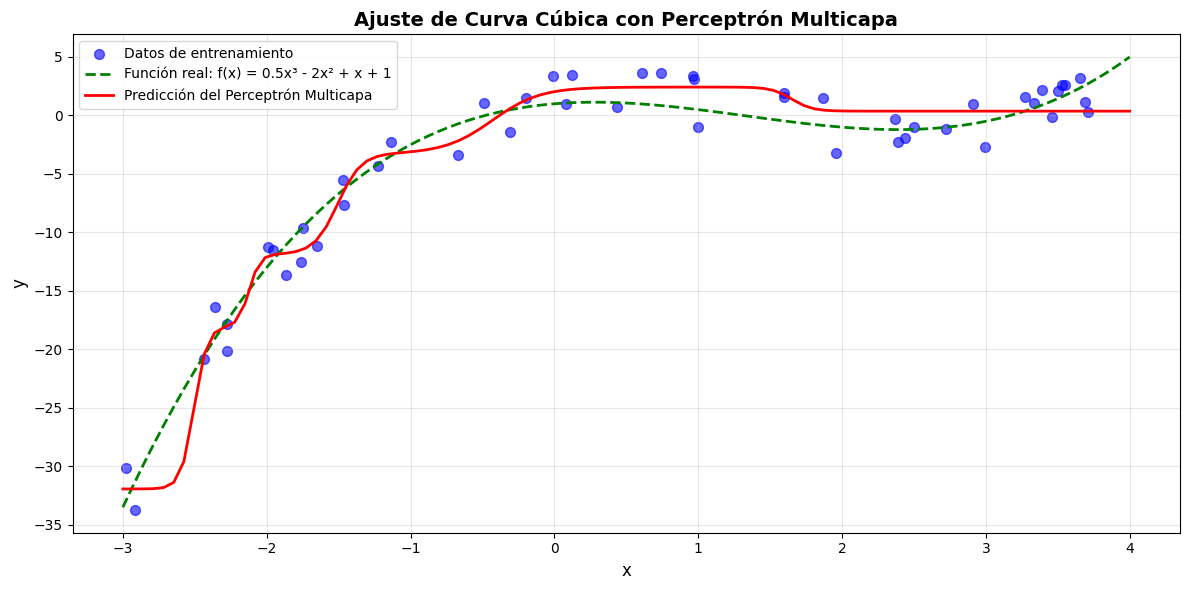

✓ Gráfico generado!


In [235]:
# Generar puntos para graficar la curva predicha
print("=== Generando gráfico ===\n")

x_prueba = np.linspace(-3, 4, 100)
y_real = [funcion_cubica(x)  for x in x_prueba]
y_predicha = [mlp_regresion.predecir([x])[0] for x in x_prueba]

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Puntos de entrenamiento
x_entrenamiento_plot = [x[0] for x in X_entrenamiento]
y_entrenamiento_plot = [y[0] for y in y_entrenamiento]
plt.scatter(x_entrenamiento_plot, y_entrenamiento_plot, 
           color='blue', alpha=0.6, s=50, label='Datos de entrenamiento')

# Curva real
plt.plot(x_prueba, y_real, 'g--', linewidth=2, label='Función real: f(x) = 0.5x³ - 2x² + x + 1')

# Curva predicha por la red
plt.plot(x_prueba, y_predicha, 'r-', linewidth=2, label='Predicción del Perceptrón Multicapa')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Ajuste de Curva Cúbica con Perceptrón Multicapa', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Gráfico generado!")
